<a href="https://colab.research.google.com/github/KerolosWageh/Face-Mask-Detection-Code/blob/main/Face_Mask_Detection_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask Detection Code

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing libraries

In [46]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Conv2D,Activation , Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Part 1 - Data Preprocessing

### Preprocessing the Training set


In [63]:
train_data_generation = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                          )

training_set = train_data_generation.flow_from_directory('/content/drive/MyDrive/DataSet Project/Dataset Face Mask /Train',
                                                        target_size=(128,128),
                                                        batch_size=16,
                                                        class_mode='binary',
                                                        color_mode='rgb',
                                                        shuffle=True,
                                                        seed=42,
)

Found 700 images belonging to 2 classes.


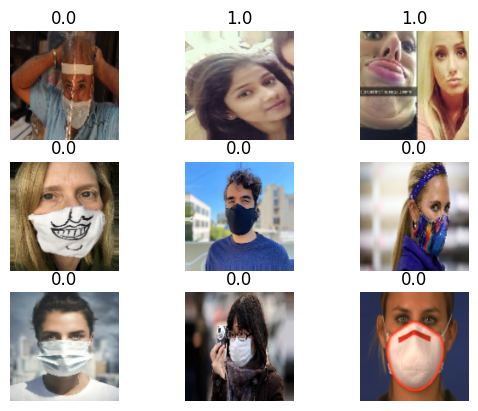

In [48]:
import matplotlib.pyplot as plt

# Get a batch of images from the training set
images, labels = next(training_set)

# Plot the images
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(images[i], cmap='gray')
  plt.title(labels[i])
  plt.axis("off")

plt.show()


### Preprocessing the Test set

In [65]:
test_data_generation = ImageDataGenerator(rescale=1./255)

testing_set = test_data_generation.flow_from_directory('/content/drive/MyDrive/DataSet Project/Dataset Face Mask /Test' ,
                                                      target_size=(128,128),
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      color_mode='rgb',
                                                      shuffle=True,
                                                      seed=42,
)

Found 292 images belonging to 2 classes.


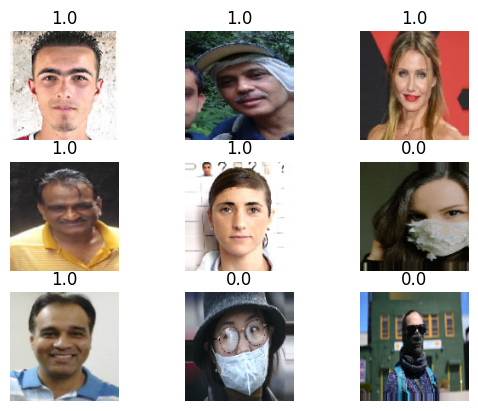

In [50]:
import matplotlib.pyplot as plt

# Get a batch of images from the training set
images, labels = next(training_set)

# Plot the images
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(images[i], cmap='gray')
  plt.title(labels[i])
  plt.axis("off")

plt.show()


## Part 2 - Building the CNN

In [51]:
model = Sequential([

              Conv2D(filters=32, kernel_size=3, activation='relu'),
              MaxPooling2D(pool_size=2,strides=2),

              Conv2D(filters=64, kernel_size=3, activation='relu'),
              MaxPooling2D(pool_size=2,strides=2),

              Flatten(),

              Dense(units=128, activation='relu'),
              Dense(units=64, activation='relu'),

              Dense(units=1, activation='sigmoid')
])


## Part 3 - Training the CNN

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(training_set,
                    epochs=50,
                    validation_data=testing_set,
                    callbacks=[early_stopping])


Epoch 1/50
44/44 [==============================] - 41s 884ms/step - loss: 0.5920 - accuracy: 0.7286 - val_loss: 0.3307 - val_accuracy: 0.8527
Epoch 2/50
44/44 [==============================] - 34s 776ms/step - loss: 0.3200 - accuracy: 0.8729 - val_loss: 0.2269 - val_accuracy: 0.9075
Epoch 3/50
44/44 [==============================] - 37s 835ms/step - loss: 0.2561 - accuracy: 0.9100 - val_loss: 0.1912 - val_accuracy: 0.9384
Epoch 4/50
44/44 [==============================] - 35s 807ms/step - loss: 0.2474 - accuracy: 0.9086 - val_loss: 0.1742 - val_accuracy: 0.9486
Epoch 5/50
44/44 [==============================] - 35s 801ms/step - loss: 0.2125 - accuracy: 0.9171 - val_loss: 0.1793 - val_accuracy: 0.9315
Epoch 6/50
44/44 [==============================] - 36s 810ms/step - loss: 0.1914 - accuracy: 0.9286 - val_loss: 0.1777 - val_accuracy: 0.9418
Epoch 7/50
44/44 [==============================] - 36s 811ms/step - loss: 0.1517 - accuracy: 0.9457 - val_loss: 0.1843 - val_accuracy: 0.9384

In [54]:
loss_test, accuracy_test=model.evaluate(testing_set, verbose=0)
loss_training, accuracy_training=model.evaluate(training_set, verbose=0)

print("accuracy of Model with Test data : {:5.2f}%".format(100*accuracy_test))
print("accuracy of Model with training data : {:5.2f}%".format(100*accuracy_training))

accuracy of Model with Test data : 93.84%
accuracy of Model with training data : 95.43%


In [55]:
model.save('/content/drive/MyDrive/DataSet Project/Dataset Face Mask /mask_detection_model.h5')

In [56]:
model.load_weights('/content/drive/MyDrive/DataSet Project/Dataset Face Mask /mask_detection_model.h5')

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, None, None, 64)    0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, None)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

## Part 4 - Making a prediction

1) Add Photo 
2) End
Enter the number : 1


Saving 44.jpg to 44.jpg


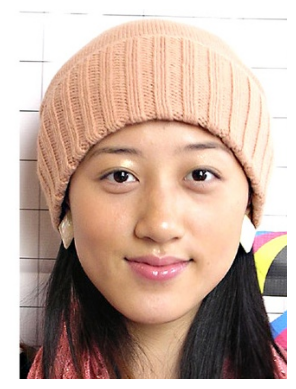

1/1 [==============================] - 0s 31ms/step
NO Mask
1) Add Photo 
2) End
Enter the number : 1


Saving 0063.jpg to 0063 (1).jpg


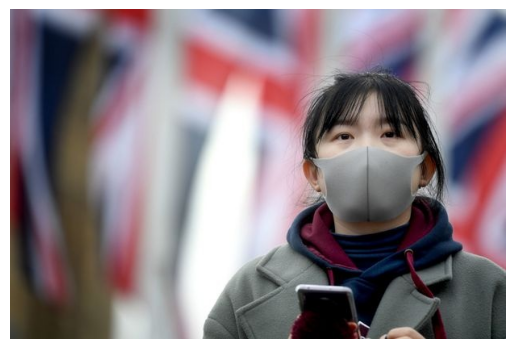

1/1 [==============================] - 0s 29ms/step
Mask
1) Add Photo 
2) End
Enter the number : 2


In [59]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array

while (True):
  print ("1) Add Photo ")
  print ("2) End")
  num = int(input("Enter the number : "))

  if num == 1 :
    uploaded = files.upload()

    uploaded_photos = []
    for file_name in uploaded.keys():

        img = load_img(file_name)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        img = load_img(file_name, target_size=(128, 128))
        img_array = img_to_array(img)
        img_array /= 255.
        uploaded_photos.append(img_array)

    uploaded_photos = np.array(uploaded_photos)

    predictions = model.predict(uploaded_photos)
    for i, pred in enumerate(predictions):
        if(pred<0.5):
            print("Mask")
        else:
            print("NO Mask")

  else:
    break

In [61]:
!pip install gradio

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr
import cv2

def predict_Face_Mask(image):
    # Resize the image to match the input shape of the model
    image = cv2.resize(image, (128, 128))

    # Reshape the image to a two-dimensional array
    image = image.reshape(-1,128,128,3)
    image = image /255

    prediction = model.predict(image)[0]

    if prediction < 0.5:
        return "Mask"
    else:
        return "NO Mask"

gr.Interface(
    fn=predict_Face_Mask,
    inputs=gr.Image(),
    outputs=gr.Text(),
    title="Face Mask Detection ",
).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a339e005aff0e99ba8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
